<div class="alert alert-block alert-success">
<h1>Convex Optimization Project #2<h1>
Amin Abdipour 401133011</h1>
</div>

# Q1

## Define MyGD

In [ ]:
import torch
import torch.nn as nn

class MyGD(torch.optim.Optimizer):
    def __init__(self, params, lr=0.001):
        defaults = dict(lr=lr)
        super(MyGD, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                p.data.add_(-group['lr'], grad)

        return loss

## a) Optimization Problem <h1>
$ \min f(x_1, x_2) = \frac{x_2^2}{x_1^2}$ <h1>
Subject to $ x_2>0 $

### Define the objective function

In [ ]:
def objective(x1, x2):
    return x1**2 / x2

def grad_objective(x1, x2):
    grad_x1 = 2 * x1 / x2
    grad_x2 = -1 * x1**2 / x2**2
    return torch.tensor([grad_x1, grad_x2])

# Initial values
x1 = torch.tensor([1.0], requires_grad=True)
z = torch.tensor([0.0], requires_grad=True)

### Use MyGD

In [ ]:
optimizer = MyGD([x1, z], lr=0.01)

### GD Loop

In [ ]:
for i in range(1000):
    x2 = torch.exp(z)
    loss = objective(x1, x2)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    # Print or log the iteration information
    print(f'Iteration {i + 1}/{1000}, x1: {x1.item()}, x2: {x2.item()}, Loss: {loss.item()}')

<ipython-input-1-a46be5571cb1>:20: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1519.)
  p.data.add_(-group['lr'], grad)


Iteration 1/1000, x1: 0.9800000190734863, x2: 1.0, Loss: 1.0
Iteration 2/1000, x1: 0.9605950713157654, x2: 1.0100501775741577, Loss: 0.950843870639801
Iteration 3/1000, x1: 0.9417543411254883, x2: 1.0196999311447144, Loss: 0.9049161076545715
Iteration 4/1000, x1: 0.9234495162963867, x2: 1.0289692878723145, Loss: 0.8619317412376404
Iteration 5/1000, x1: 0.9056545495986938, x2: 1.0378766059875488, Loss: 0.8216381669044495
Iteration 6/1000, x1: 0.8883453011512756, x2: 1.046439290046692, Loss: 0.783810555934906
Iteration 7/1000, x1: 0.8714994192123413, x2: 1.054673671722412, Loss: 0.7482479214668274
Iteration 8/1000, x1: 0.855096161365509, x2: 1.0625948905944824, Loss: 0.7147702574729919
Iteration 9/1000, x1: 0.8391162753105164, x2: 1.0702171325683594, Loss: 0.6832159757614136
Iteration 10/1000, x1: 0.8235418200492859, x2: 1.0775541067123413, Loss: 0.6534392237663269
Iteration 11/1000, x1: 0.808355987071991, x2: 1.084618330001831, Loss: 0.6253085136413574
Iteration 12/1000, x1: 0.793543100

In [ ]:
x2 = torch.exp(z)
final_result = (x1.item(), x2.item())
print(f'Optimal solution: x1 = {final_result[0]}, x2 = {final_result[1]}, Minimum value: {objective(*final_result)}')

Optimal solution: x1 = 1.3956349675936508e-07, x2 = 1.2868976593017578, Minimum value: 1.5135601099989274e-14


## b) Classify MNIST Dataset with MyGD Optimizer

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### Load MNIST dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

### Define Network

In [ ]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = MyNet()
optimizer = MyGD(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

### Train

In [ ]:
loss_values = []

for epoch in range(20):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
    loss_values.append(loss.item())

        # Print the loss
    print(f'Epoch [{epoch + 1}/{20}], Loss: {loss.item()}')

Epoch [1/20], Loss: 2.053619384765625
Epoch [2/20], Loss: 1.6897128820419312
Epoch [3/20], Loss: 0.949285089969635
Epoch [4/20], Loss: 0.7740514874458313
Epoch [5/20], Loss: 0.7070786952972412
Epoch [6/20], Loss: 0.6551414728164673
Epoch [7/20], Loss: 0.5353940725326538
Epoch [8/20], Loss: 0.4001172184944153
Epoch [9/20], Loss: 0.40212804079055786
Epoch [10/20], Loss: 0.2390829473733902
Epoch [11/20], Loss: 0.311837762594223
Epoch [12/20], Loss: 0.2997358441352844
Epoch [13/20], Loss: 0.4211260676383972
Epoch [14/20], Loss: 0.27513355016708374
Epoch [15/20], Loss: 0.2037477344274521
Epoch [16/20], Loss: 0.3633786737918854
Epoch [17/20], Loss: 0.1400723159313202
Epoch [18/20], Loss: 0.1475607454776764
Epoch [19/20], Loss: 0.25815147161483765
Epoch [20/20], Loss: 0.23419153690338135


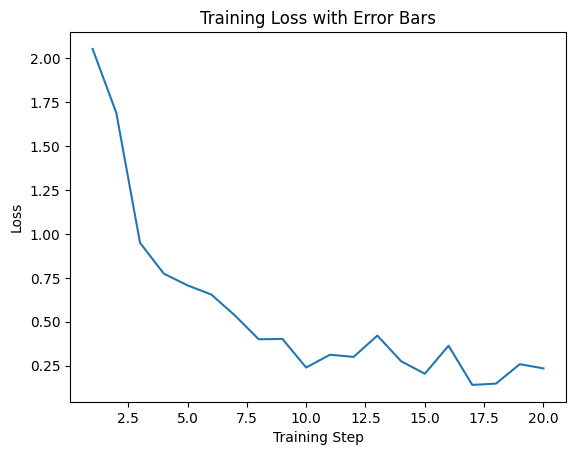

In [ ]:
from matplotlib import pyplot as plt
plt.errorbar(range(1, len(loss_values) + 1), loss_values, fmt='-', yerr=None, ecolor='red', capsize=5)
plt.title('Training Loss with Error Bars')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.show()

### Test Model

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {100 * accuracy:.2f}%')


Test Accuracy: 91.01%
